### Read the xls file and convert to csv 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [209]:
df = pd.read_excel('credit_card_clients.xls')

In [210]:
df.to_csv ('credit_card_clients.csv', index = False, header=None)

In [2]:
df = pd.read_csv('credit_card_clients.csv', index_col=0 )

In [3]:
df

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1          20000    2          2         1   24      2      2     -1     -1   
2         120000    2          2         2   26     -1      2      0      0   
3          90000    2          2         2   34      0      0      0      0   
4          50000    2          2         1   37      0      0      0      0   
5          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29996     220000    1          3         1   39      0      0      0      0   
29997     150000    1          3         2   43     -1     -1     -1     -1   
29998      30000    1          2         2   37      4      3      2     -1   
29999      80000    1          3         1   41      1     -1      0      0   
30000      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
1         -2  ...          0          0          0         0       689   
2          0  ...       3272       3455       3261         0      1000   
3          0  ...      14331      14948      15549      1518      1500   
4          0  ...      28314      28959      29547      2000      2019   
5          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29996      0  ...      88004      31237      15980      8500     20000   
29997      0  ...       8979       5190          0      1837      3526   
29998      0  ...      20878      20582      19357         0         0   
29999      0  ...      52774      11855      48944     85900      3409   
30000      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
ID                                                                         
1             0         0         0         0                           1  
2          1000      1000         0      2000                           1  
3          1000      1000      1000      5000                           0  
4          1200      1100      1069      1000                           0  
5         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29996      5003      3047      5000      1000                           0  
29997      8998       129         0         0                           0  
29998     22000      4200      2000      3100                           1  
29999      1178      1926     52964      1804                           1  
30000      1430      1000      1000      1000                           1  

[30000 rows x 24 columns]

In [4]:
# Rename last column 
df = df.rename(columns={'default payment next month': 'Y'})
df = df.rename(columns={'PAY_0': 'PAY_1'})


In [214]:
df

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1          20000    2          2         1   24      2      2     -1     -1   
2         120000    2          2         2   26     -1      2      0      0   
3          90000    2          2         2   34      0      0      0      0   
4          50000    2          2         1   37      0      0      0      0   
5          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29996     220000    1          3         1   39      0      0      0      0   
29997     150000    1          3         2   43     -1     -1     -1     -1   
29998      30000    1          2         2   37      4      3      2     -1   
29999      80000    1          3         1   41      1     -1      0      0   
30000      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
1         -2  ...          0          0          0         0       689   
2          0  ...       3272       3455       3261         0      1000   
3          0  ...      14331      14948      15549      1518      1500   
4          0  ...      28314      28959      29547      2000      2019   
5          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29996      0  ...      88004      31237      15980      8500     20000   
29997      0  ...       8979       5190          0      1837      3526   
29998      0  ...      20878      20582      19357         0         0   
29999      0  ...      52774      11855      48944     85900      3409   
30000      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Y  
ID                                                
1             0         0         0         0  1  
2          1000      1000         0      2000  1  
3          1000      1000      1000      5000  0  
4          1200      1100      1069      1000  0  
5         10000      9000       689       679  0  
...         ...       ...       ...       ... ..  
29996      5003      3047      5000      1000  0  
29997      8998       129         0         0  0  
29998     22000      4200      2000      3100  1  
29999      1178      1926     52964      1804  1  
30000      1430      1000      1000      1000  1  

[30000 rows x 24 columns]

# Lets understand the data

In [ ]:
There are 25 variables

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_1: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [31]:
df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6             Y  
count   30000.000000  30000.000000  
mean     5215.502567      0.221200  
std     17777.465775      0.415062  
min         0.000000      0.000000  
25%       117.750000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000  

[8 rows x 24 columns]

In [32]:
df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Y            0
dtype: int64

In [33]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Y            0
dtype: int64

In [215]:
df['Y'].value_counts()

0    23364
1     6636
Name: Y, dtype: int64

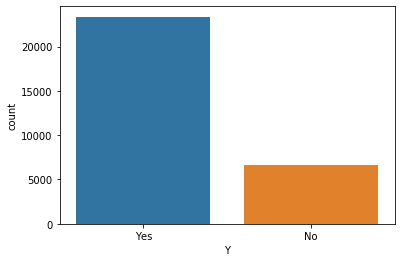

In [216]:
# visualize the target variable
g = sns.countplot(df['Y'])
g.set_xticklabels(['Yes','No'])
plt.show()

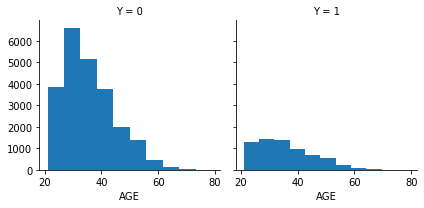

In [217]:
g = sns.FacetGrid(df, col = 'Y')
g.map(plt.hist, 'AGE')

In [ ]:
After analysing the data we understand that the following colums are categorical data and numerical data 

Categorical data : SEX, EDUCATION, MARRIAGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6
Numerical Data  : LIMIT_BAL, AGE, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6,
    PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6
    
Target : Y

In [218]:
# Find out all the unique values in Categorical data 
print(df['SEX'].unique())
print(df['EDUCATION'].unique())
print(df['MARRIAGE'].unique())
print(df['PAY_1'].unique())
print(df['PAY_2'].unique())
print(df['PAY_3'].unique())
print(df['PAY_4'].unique())
print(df['PAY_5'].unique())
print(df['PAY_6'].unique())




[2 1]
[2 1 3 5 4 6 0]
[1 2 3 0]
[ 2 -1  0 -2  1  3  4  8  7  5  6]
[ 2  0 -1 -2  3  5  7  4  1  6  8]
[-1  0  2 -2  3  4  6  7  1  5  8]
[-1  0 -2  2  3  4  5  7  6  1  8]
[-2  0 -1  2  3  5  4  7  8  6]
[-2  2  0 -1  3  6  4  7  8  5]


# Data cleansing 

Education column has values 0,5 and 6 which are unknown . We will change the values to 4 "others"
Marriage column has value 0 which means unknown . We will change it to 3 which is "others"

In [219]:
#df_ed = df.iloc[df[:, 2] == 0, 5, 6]
df_ed = df[df.iloc[:, 2].isin([0, 5, 6])] 

In [79]:
df_ed

Empty DataFrame
Columns: [LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, Y]
Index: []

[0 rows x 24 columns]

In [5]:
df[df.iloc[:, [2]].isin([0, 5, 6])] = 4 # Update  Education unknown values the values to 4 

In [6]:
df[df.iloc[:, [3]] == 0] = 3 # Update Marriage unknown values to 3

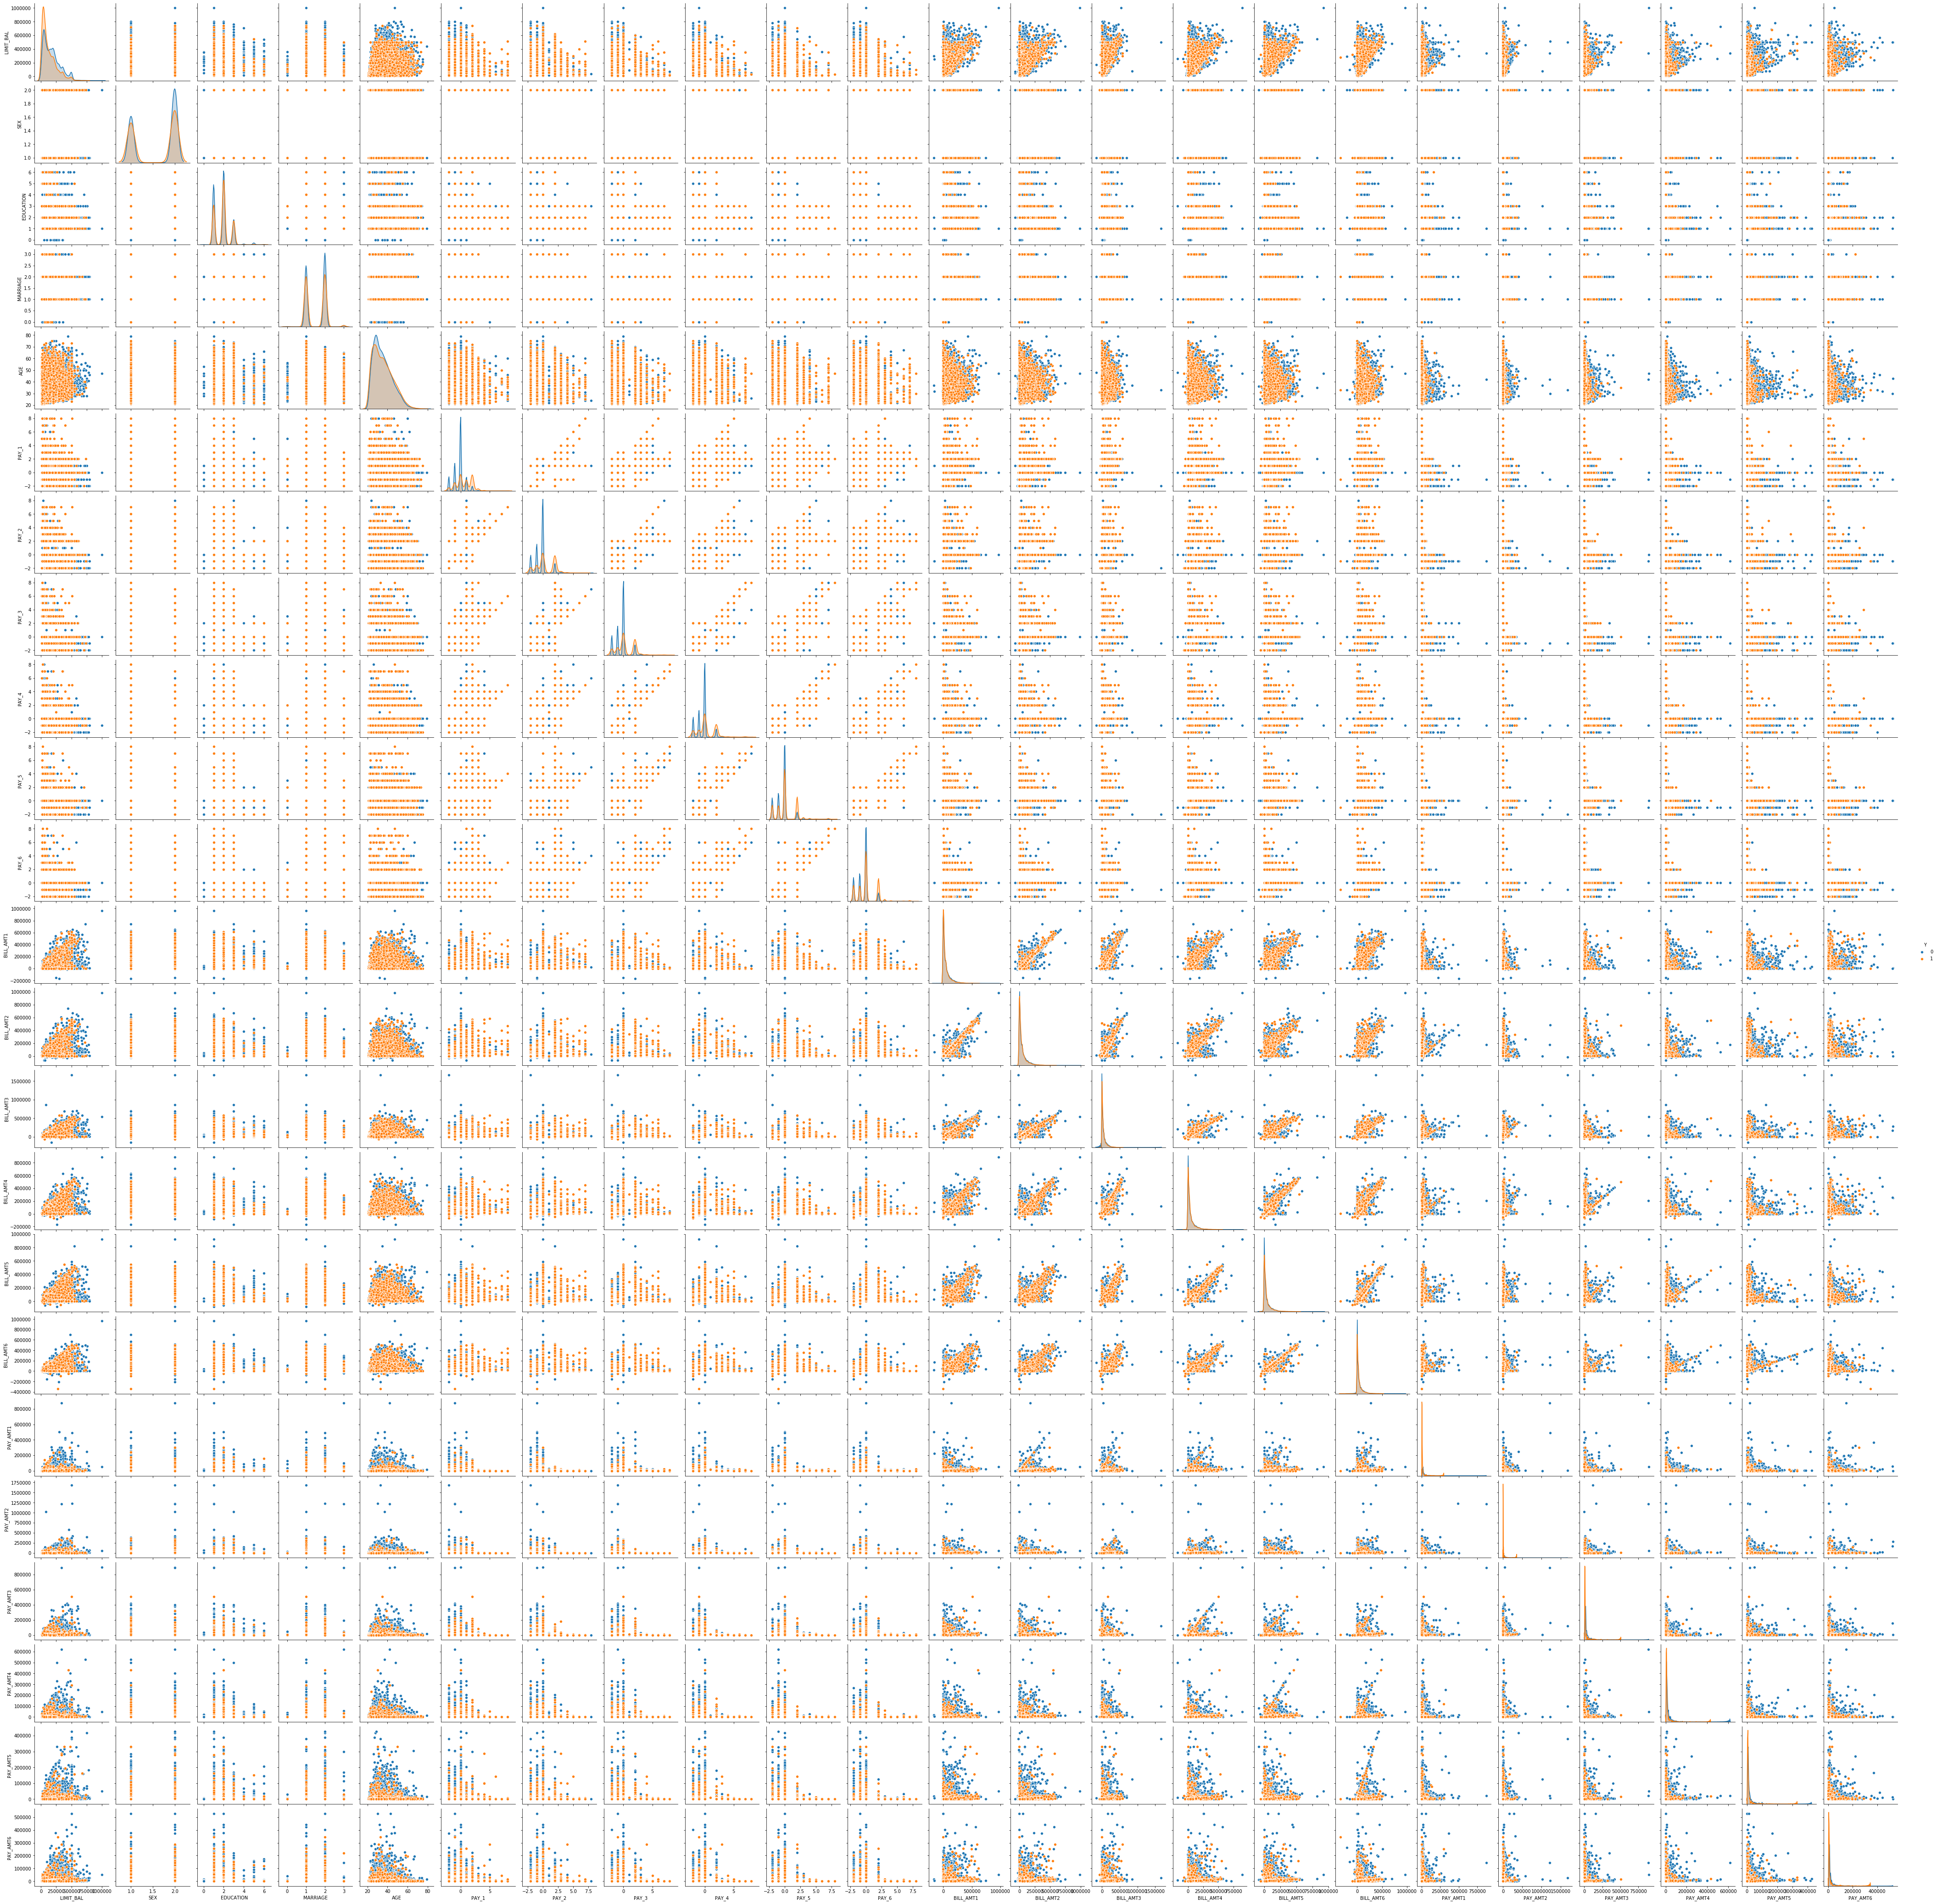

In [53]:
sns.pairplot(df, hue="Y")

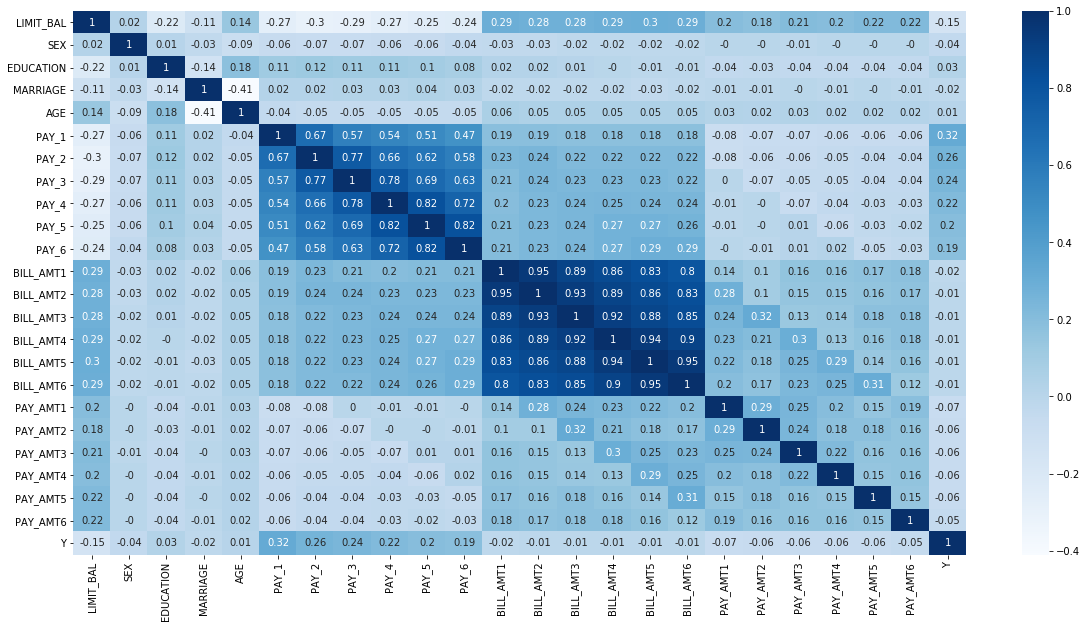

In [57]:
plt.figure(figsize=(20,10))

sns.heatmap(round(df.corr(),2),annot=True,cmap="Blues");

# Find the performance of the models with basic data updates

Let us find the model performance with basic data before feature engineering 

In [7]:
def train_model(X, y, select_model, yislog = 'N'):
    if select_model == 'svm':
        model = SVC(kernel="linear", C=0.025, verbose=True, random_state=42)
    elif select_model == 'lr':
        model = LogisticRegression()
    elif select_model == 'xg':
        model = XGBClassifier()
    elif select_model == 'rf':
        model = RandomForestClassifier()
    elif select_model == 'knn':
        model = KNeighborsClassifier(n_neighbors=15)
        
    model.fit(X, np.log(y)) if yislog == 'Y' else  model.fit(X, y)
      
    return model

In [8]:
def evaluate_model(model, X, y, yislog = "N"):
    y_pred = model.predict(X)
    
    if yislog == 'Y':
        y_pred = np.exp(y_pred)
    
    mse = mean_squared_error(y,y_pred)

    mae = mean_absolute_error(y,y_pred)

    #matrix = confusion_matrix(y, y_pred)
    #msle = mean_squared_log_error(y,predictions)
    accuracy = accuracy_score(y_true = y, y_pred = y_pred)

    mse = round(mse,2)

    mae = round(mae,2)

    #msle = round(msle,2)

    return [mse, mae, accuracy]

In [9]:
X = df.iloc[:, :-1]
y = df["Y"]

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: Y, Length: 30000, dtype: int64

In [10]:
class Model:
    def __init__(self, X, y, prob_type, model=None, test_size= 0.3):
        self.prob_type = prob_type
        self.model = model
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size= test_size, random_state= 42)        

    
    def _evaluate_model(self, model, yislog = "N"):
        model.fit(self.X_train, np.log(y)) if yislog == 'Y' else  model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)

        if yislog == 'Y':
            y_pred = np.exp(y_pred)

        mse = mean_squared_error(self.y_test,y_pred)

        mae = mean_absolute_error(self.y_test,y_pred)

        #matrix = confusion_matrix(y, y_pred)
        #msle = mean_squared_log_error(y,predictions)
        accuracy = accuracy_score(y_true = self.y_test, y_pred = y_pred)
        print("Accuracy:", accuracy)
        precision = precision_score(y_true = self.y_test, y_pred = y_pred)
        print("Precision: ", precision)
        recall = recall_score(y_true = self.y_test, y_pred = y_pred)
        print("Recall: ", recall)
        f1 = f1_score(y_true = self.y_test, y_pred = y_pred)
        print("F1 Score: ", f1)
        
        mse = round(mse,2)

        mae = round(mae,2)
    
    def train_model(self):
        
        if self.model == 'svm':
            model = SVC(kernel="linear", C=0.025, verbose=True, random_state=42)
            print("----SVM Model-----")
            self._evaluate_model(model)
            
        elif self.model == 'lr':
            model = LogisticRegression()
            print("----Logistic Regression Model-----")
            self._evaluate_model(model)
        elif self.model == 'xg':
            model = XGBClassifier()
            print("----XGBoost Model-----")
            self._evaluate_model(model)
        elif self.model == 'rf':
            model = RandomForestClassifier()
            print("----Random Forest Model-----")
            self._evaluate_model(model)
        elif self.model == 'knn':
            model = KNeighborsClassifier(n_neighbors=15)
            print("----KNN Model-----")
            self._evaluate_model(model)
        else :
            model = LogisticRegression()
            print("----Logistic Regression Model-----")
            self._evaluate_model(model)
            
            model = XGBClassifier()
            print("----XGBoost Model-----")
            self._evaluate_model(model)
            
            model = RandomForestClassifier()
            print("----Random Forest Model-----")
            self._evaluate_model(model)
            
            model = KNeighborsClassifier(n_neighbors=15)
            print("----KNN Model-----")
            self._evaluate_model(model)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 23)
(9000, 23)
(21000,)
(9000,)


In [ ]:
svm_model = train_model(X_train, y_train, 'svm')


[LibSVM]

In [83]:
xg_model = train_model(X_train, y_train, 'xg')
xg_mse, xg_mae, xg_acc = evaluate_model(xg_model, X_test, y_test)
print(xg_mse)
print(xg_mae)
print(xg_acc)

C:\Users\PRINCY\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:47:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.19
0.19
0.8138888888888889


In [84]:
lr_model = train_model(X_train, y_train, 'lr')
lr_mse, lr_mae, lr_acc = evaluate_model(lr_model, X_test, y_test)
print(lr_mse)
print(lr_mae)
print(lr_acc)

0.42
0.27
0.7695555555555555


C:\Users\PRINCY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [85]:
rf_model = train_model(X_train, y_train, 'rf')
rf_mse, rf_mae, rf_acc = evaluate_model(rf_model, X_test, y_test)
print(rf_mse)
print(rf_mae)
print(rf_acc)



0.19
0.19
0.8137777777777778


In [86]:
knn_model = train_model(X_train, y_train, 'knn')
knn_mse, knn_mae, knn_acc = evaluate_model(knn_model, X_test, y_test)
print(knn_mse)
print(knn_mae)
print(knn_acc)


0.23
0.23
0.7727777777777778


# Feature Engineering

Let us perform feature engineering and create new colums and see if the following have an impact on the model . 
For example, sex and marriage status can be combined to have a new column curr_status
Age can be binned into categories

In [11]:
cat_col = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
num_col = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [12]:
cat_df = df[cat_col]
num_df = df[num_col]


In [13]:
#Cut age in different bins
cat_df['AGE_BIN'] = pd.cut(x=cat_df['AGE'], bins=[20, 29, 39, 49,59, 69, 79, 89], labels=['1', '2', '3', '4', '5', '6', '7'])

C:\Users\PRINCY\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
cat_df

SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  \
ID                                                                        
1        2          2         1   24      2      2     -1     -1     -2   
2        2          2         2   26     -1      2      0      0      0   
3        2          2         2   34      0      0      0      0      0   
4        2          2         1   37      0      0      0      0      0   
5        1          2         1   57     -1      0     -1      0      0   
...    ...        ...       ...  ...    ...    ...    ...    ...    ...   
29996    1          3         1   39      0      0      0      0      0   
29997    1          3         2   43     -1     -1     -1     -1      0   
29998    1          2         2   37      4      3      2     -1      0   
29999    1          3         1   41      1     -1      0      0      0   
30000    1          2         1   46      0      0      0      0      0   

       PAY_6 AGE_BIN  
ID                    
1         -2       1  
2          2       1  
3          0       2  
4          0       2  
5          0       4  
...      ...     ...  
29996      0       2  
29997      0       3  
29998      0       2  
29999     -1       3  
30000      0       3  

[30000 rows x 11 columns]

In [15]:
# Scaling the Numerical values
scalar = StandardScaler()
num_df[num_col] = scalar.fit_transform(num_df[num_col])

C:\Users\PRINCY\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\PRINCY\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [235]:
num_df

LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
ID                                                                        
1      -1.136720  -0.642501  -0.647399  -0.667993  -0.672497  -0.663059   
2      -0.365981  -0.659219  -0.666747  -0.639254  -0.621636  -0.606229   
3      -0.597202  -0.298560  -0.493899  -0.482408  -0.449730  -0.417188   
4      -0.905498  -0.057491  -0.013293   0.032846  -0.232373  -0.186729   
5      -0.905498  -0.578618  -0.611318  -0.161189  -0.346997  -0.348137   
...          ...        ...        ...        ...        ...        ...   
29996   0.404759   1.870379   2.018136   2.326690   0.695474  -0.149259   
29997  -0.134759  -0.672786  -0.665299  -0.627430  -0.532924  -0.577691   
29998  -1.059646  -0.647227  -0.643830  -0.638158  -0.347961  -0.324517   
29999  -0.674276  -0.717982   0.410269   0.422373   0.147844  -0.468063   
30000  -0.905498  -0.044739  -0.003851   0.039667  -0.104582  -0.129669   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
ID                                                                            
1      -0.652724 -0.341942 -0.227086 -0.296801 -0.308063 -0.314136 -0.293382  
2      -0.597966 -0.341942 -0.213588 -0.240005 -0.244230 -0.314136 -0.180878  
3      -0.391630 -0.250292 -0.191887 -0.240005 -0.244230 -0.248683 -0.012122  
4      -0.156579 -0.221191 -0.169361 -0.228645 -0.237846 -0.244166 -0.237130  
5      -0.331482 -0.221191  1.335034  0.271165  0.266434 -0.269039 -0.255187  
...          ...       ...       ...       ...       ...       ...       ...  
29996  -0.384392  0.171250  0.611048 -0.012648 -0.113564  0.013131 -0.237130  
29997  -0.652724 -0.231032 -0.103955  0.214255 -0.299828 -0.314136 -0.293382  
29998  -0.327687 -0.341942 -0.256990  0.952725 -0.039964 -0.183229 -0.119001  
29999   0.169130  4.844316 -0.109033 -0.229895 -0.185120  3.152536 -0.191904  
30000  -0.395592 -0.216481 -0.178866 -0.215582 -0.244230 -0.248683 -0.237130  

[30000 rows x 13 columns]

In [16]:
df_encoded = pd.concat([num_df, cat_df],axis=1)

In [17]:
df_encoded

LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
ID                                                                        
1      -1.136720  -0.642501  -0.647399  -0.667993  -0.672497  -0.663059   
2      -0.365981  -0.659219  -0.666747  -0.639254  -0.621636  -0.606229   
3      -0.597202  -0.298560  -0.493899  -0.482408  -0.449730  -0.417188   
4      -0.905498  -0.057491  -0.013293   0.032846  -0.232373  -0.186729   
5      -0.905498  -0.578618  -0.611318  -0.161189  -0.346997  -0.348137   
...          ...        ...        ...        ...        ...        ...   
29996   0.404759   1.870379   2.018136   2.326690   0.695474  -0.149259   
29997  -0.134759  -0.672786  -0.665299  -0.627430  -0.532924  -0.577691   
29998  -1.059646  -0.647227  -0.643830  -0.638158  -0.347961  -0.324517   
29999  -0.674276  -0.717982   0.410269   0.422373   0.147844  -0.468063   
30000  -0.905498  -0.044739  -0.003851   0.039667  -0.104582  -0.129669   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  ...  EDUCATION  MARRIAGE  AGE  \
ID                                              ...                             
1      -0.652724 -0.341942 -0.227086 -0.296801  ...          2         1   24   
2      -0.597966 -0.341942 -0.213588 -0.240005  ...          2         2   26   
3      -0.391630 -0.250292 -0.191887 -0.240005  ...          2         2   34   
4      -0.156579 -0.221191 -0.169361 -0.228645  ...          2         1   37   
5      -0.331482 -0.221191  1.335034  0.271165  ...          2         1   57   
...          ...       ...       ...       ...  ...        ...       ...  ...   
29996  -0.384392  0.171250  0.611048 -0.012648  ...          3         1   39   
29997  -0.652724 -0.231032 -0.103955  0.214255  ...          3         2   43   
29998  -0.327687 -0.341942 -0.256990  0.952725  ...          2         2   37   
29999   0.169130  4.844316 -0.109033 -0.229895  ...          3         1   41   
30000  -0.395592 -0.216481 -0.178866 -0.215582  ...          2         1   46   

       PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  AGE_BIN  
ID                                                        
1          2      2     -1     -1     -2     -2        1  
2         -1      2      0      0      0      2        1  
3          0      0      0      0      0      0        2  
4          0      0      0      0      0      0        2  
5         -1      0     -1      0      0      0        4  
...      ...    ...    ...    ...    ...    ...      ...  
29996      0      0      0      0      0      0        2  
29997     -1     -1     -1     -1      0      0        3  
29998      4      3      2     -1      0      0        2  
29999      1     -1      0      0      0     -1        3  
30000      0      0      0      0      0      0        3  

[30000 rows x 24 columns]

In [105]:
X = df_encoded.iloc[:,:-1]


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [107]:
xg_model = train_model(X_train, y_train, 'xg')
xg_mse, xg_mae, xg_acc = evaluate_model(xg_model, X_test, y_test)
print(xg_mse)
print(xg_mae)
print(xg_acc)

C:\Users\PRINCY\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.18
0.18
0.8151111111111111


In [108]:
rf_model = train_model(X_train, y_train, 'rf')
rf_mse, rf_mae, rf_acc = evaluate_model(rf_model, X_test, y_test)
print(rf_mse)
print(rf_mae)
print(rf_acc)



0.18
0.18
0.8161111111111111


In [18]:
df_encoded['STATUS'] = 0
df_encoded.loc[((df_encoded.SEX == 1) & (df_encoded.MARRIAGE == 1)) , 'STATUS'] = 1 #married man
df_encoded.loc[((df_encoded.SEX == 1) & (df_encoded.MARRIAGE == 2)) , 'STATUS'] = 2 #single man
df_encoded.loc[((df_encoded.SEX == 1) & (df_encoded.MARRIAGE == 3)) , 'STATUS'] = 3 #divorced or widowed man
df_encoded.loc[((df_encoded.SEX == 2) & (df_encoded.MARRIAGE == 1)) , 'STATUS'] = 4 #married woman
df_encoded.loc[((df_encoded.SEX == 2) & (df_encoded.MARRIAGE == 2)) , 'STATUS'] = 5 #single woman
df_encoded.loc[((df_encoded.SEX == 2) & (df_encoded.MARRIAGE == 3)) , 'STATUS'] = 6 #divorced or widowed woman


In [19]:
df_encoded

LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
ID                                                                        
1      -1.136720  -0.642501  -0.647399  -0.667993  -0.672497  -0.663059   
2      -0.365981  -0.659219  -0.666747  -0.639254  -0.621636  -0.606229   
3      -0.597202  -0.298560  -0.493899  -0.482408  -0.449730  -0.417188   
4      -0.905498  -0.057491  -0.013293   0.032846  -0.232373  -0.186729   
5      -0.905498  -0.578618  -0.611318  -0.161189  -0.346997  -0.348137   
...          ...        ...        ...        ...        ...        ...   
29996   0.404759   1.870379   2.018136   2.326690   0.695474  -0.149259   
29997  -0.134759  -0.672786  -0.665299  -0.627430  -0.532924  -0.577691   
29998  -1.059646  -0.647227  -0.643830  -0.638158  -0.347961  -0.324517   
29999  -0.674276  -0.717982   0.410269   0.422373   0.147844  -0.468063   
30000  -0.905498  -0.044739  -0.003851   0.039667  -0.104582  -0.129669   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  ...  MARRIAGE  AGE  PAY_1  \
ID                                              ...                         
1      -0.652724 -0.341942 -0.227086 -0.296801  ...         1   24      2   
2      -0.597966 -0.341942 -0.213588 -0.240005  ...         2   26     -1   
3      -0.391630 -0.250292 -0.191887 -0.240005  ...         2   34      0   
4      -0.156579 -0.221191 -0.169361 -0.228645  ...         1   37      0   
5      -0.331482 -0.221191  1.335034  0.271165  ...         1   57     -1   
...          ...       ...       ...       ...  ...       ...  ...    ...   
29996  -0.384392  0.171250  0.611048 -0.012648  ...         1   39      0   
29997  -0.652724 -0.231032 -0.103955  0.214255  ...         2   43     -1   
29998  -0.327687 -0.341942 -0.256990  0.952725  ...         2   37      4   
29999   0.169130  4.844316 -0.109033 -0.229895  ...         1   41      1   
30000  -0.395592 -0.216481 -0.178866 -0.215582  ...         1   46      0   

       PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  AGE_BIN  STATUS  
ID                                                         
1          2     -1     -1     -2     -2        1       4  
2          2      0      0      0      2        1       5  
3          0      0      0      0      0        2       5  
4          0      0      0      0      0        2       4  
5          0     -1      0      0      0        4       1  
...      ...    ...    ...    ...    ...      ...     ...  
29996      0      0      0      0      0        2       1  
29997     -1     -1     -1      0      0        3       2  
29998      3      2     -1      0      0        2       2  
29999     -1      0      0      0     -1        3       1  
30000      0      0      0      0      0        3       1  

[30000 rows x 25 columns]

----Logistic Regression Model-----
Accuracy: 0.8086666666666666
Precision:  0.6776119402985075
Recall:  0.2316326530612245
F1 Score:  0.3452471482889734
----XGBoost Model-----


C:\Users\PRINCY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\PRINCY\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.AGE_BIN

# Feature Selection

In [243]:
ordered_features = SelectKBest(score_func=chi2, k=20)
ordered_features.fit(df_encoded, y)

ValueError: Input X must be non-negative.

In [245]:
model = ExtraTreesClassifier()
model.fit(df_encoded, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [246]:
print(model.feature_importances_)

[0.06516045 0.04803232 0.04442612 0.04280833 0.04223773 0.04116744
 0.04272353 0.04195774 0.04056915 0.04024596 0.03936411 0.04129261
 0.0448738  0.00702113 0.03035195 0.01210101 0.05871629 0.10187481
 0.04928325 0.03483918 0.02776995 0.03176066 0.02769218 0.02882211
 0.0149082 ]


In [247]:
ranked_features = pd.Series(model.feature_importances_, index=df_encoded.columns)

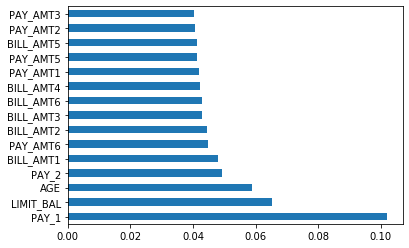

In [250]:
ranked_features.nlargest(15).plot(kind='barh')
plt.show()

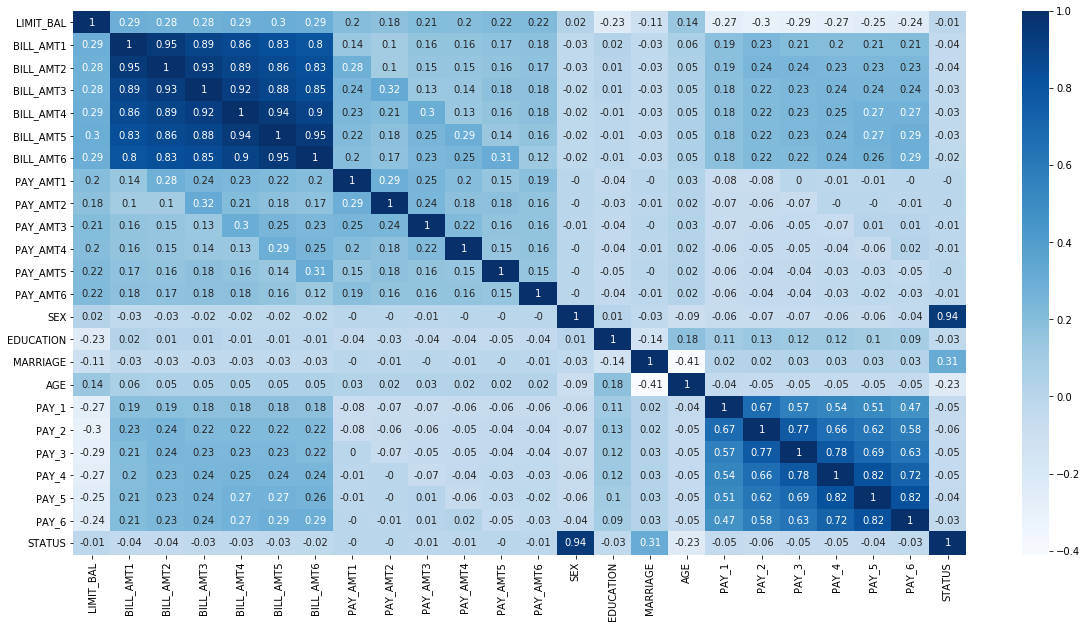

In [251]:
plt.figure(figsize=(20,10))

sns.heatmap(round(df_encoded.corr(),2),annot=True,cmap="Blues");

In [253]:
mutual_info = mutual_info_classif(df_encoded, y)

In [254]:
mutual_features = pd.Series(mutual_info, index=df_encoded.columns)
mutual_features.sort_values(ascending=False)

PAY_1        0.077154
PAY_2        0.049435
PAY_3        0.036703
PAY_4        0.033099
PAY_5        0.030848
PAY_6        0.024490
PAY_AMT1     0.023689
PAY_AMT2     0.018464
PAY_AMT3     0.017216
LIMIT_BAL    0.015578
PAY_AMT4     0.015432
PAY_AMT6     0.013439
PAY_AMT5     0.011523
BILL_AMT1    0.010311
BILL_AMT6    0.008163
BILL_AMT5    0.007022
BILL_AMT3    0.006302
EDUCATION    0.005342
AGE_BIN      0.005320
SEX          0.004822
BILL_AMT2    0.004463
BILL_AMT4    0.003428
MARRIAGE     0.003258
STATUS       0.001853
AGE          0.000000
dtype: float64

In [33]:
final_col = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION', 'SEX']

In [34]:
X = df_encoded[final_col]

In [35]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', y.shape)
print('Resample dataset shape', y_smote.shape)

Original dataset shape (30000,)
Resample dataset shape (46728,)


In [265]:
pip install imblearn --user

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
Note: you may need to restart the kernel to use updated packages.


In [267]:
pip install delayed

Note: you may need to restart the kernel to use updated packages.


In [36]:
model = Model(x_smote, y_smote, 'C', )
model.train_model()

----Logistic Regression Model-----
Accuracy: 0.6668806619587703
Precision:  0.6704975269130056
Recall:  0.6571143427430852
F1 Score:  0.6637384792626728
----XGBoost Model-----


C:\Users\PRINCY\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:46:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8385762179898709
Precision:  0.8684659531565069
Recall:  0.798260621613915
F1 Score:  0.8318847039595869
----Random Forest Model-----
Accuracy: 0.8352949568442828
Precision:  0.845905013968534
Recall:  0.8202167094382663
F1 Score:  0.8328628302569672
----KNN Model-----
Accuracy: 0.7396390612739853
Precision:  0.7118387909319899
Recall:  0.8058169375534645
F1 Score:  0.7559181489902368


In [37]:
x_smote

PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  LIMIT_BAL  BILL_AMT1  \
0          2      2     -1     -1     -2     -2  -1.136720  -0.642501   
1         -1      2      0      0      0      2  -0.365981  -0.659219   
2          0      0      0      0      0      0  -0.597202  -0.298560   
3          0      0      0      0      0      0  -0.905498  -0.057491   
4         -1      0     -1      0      0      0  -0.905498  -0.578618   
...      ...    ...    ...    ...    ...    ...        ...        ...   
46723      1      3      2      2      0      0  -1.041876  -0.319246   
46724      2      2      2      2      2      2  -0.968831  -0.292195   
46725      2      2      2      0      0      0   0.117235   1.743474   
46726      0      0      0      0      2      2  -0.289657   0.757501   
46727      0      0      0      0      0      0  -0.366387   0.591812   

       BILL_AMT2  BILL_AMT3  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      -0.647399  -0.667993  ...  -0.663059  -0.652724 -0.341942 -0.227086   
1      -0.666747  -0.639254  ...  -0.606229  -0.597966 -0.341942 -0.213588   
2      -0.493899  -0.482408  ...  -0.417188  -0.391630 -0.250292 -0.191887   
3      -0.013293   0.032846  ...  -0.186729  -0.156579 -0.221191 -0.169361   
4      -0.611318  -0.161189  ...  -0.348137  -0.331482 -0.221191  1.335034   
...          ...        ...  ...        ...        ...       ...       ...   
46723  -0.311736  -0.283514  ...  -0.215186  -0.185597 -0.341942 -0.209585   
46724  -0.274129  -0.221915  ...  -0.124375  -0.091178 -0.297291 -0.137954   
46725   1.810002   1.875643  ...   2.138088   1.718151 -0.132448 -0.053711   
46726   0.848438   0.933471  ...   1.438909   1.531598 -0.083785 -0.081670   
46727   0.602377   0.513070  ...   0.649930   0.718134 -0.128719 -0.124537   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  EDUCATION  SEX  
0     -0.296801 -0.308063 -0.314136 -0.293382          2    2  
1     -0.240005 -0.244230 -0.314136 -0.180878          2    2  
2     -0.240005 -0.244230 -0.248683 -0.012122          2    2  
3     -0.228645 -0.237846 -0.244166 -0.237130          2    2  
4      0.271165  0.266434 -0.269039 -0.255187          2    1  
...         ...       ...       ...       ...        ...  ...  
46723 -0.296801 -0.241526 -0.245457 -0.216993          2    2  
46724 -0.293301 -0.147515 -0.225546 -0.243671          2    1  
46725 -0.010905  0.080311  0.141832  0.034654          2    2  
46726  0.844660 -0.305639 -0.019914 -0.291301          2    2  
46727 -0.117538 -0.122350 -0.109638 -0.114638          1    1  

[46728 rows x 21 columns]

In [28]:
y_smote.isna().sum()

0

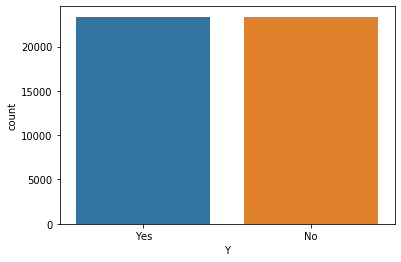

In [38]:
# visualize the target variable
g = sns.countplot(y_smote)
g.set_xticklabels(['Yes','No'])
plt.show()

In [40]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}